In [ ]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 실습용 데이터 패키지
from sklearn.datasets import load_iris, make_moons, load_breast_cancer

import os

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm import tqdm
from sklearn.model_selection import KFold

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [ ]:
# iris데이터의 2개 class(Iris-setosa, Iris-Versicolor)에 대해 고려해보자

iris = load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] # Iris-setosa 와 Iris-Versicolor 에 대해 고려해보자 0,1 이진분류만 할꺼라서 !=2
data.tail()

,petal length,petal width,target
95,0.251221,0.000878,1
96,0.251221,0.132510,1
97,0.308059,0.132510,1
98,-0.430828,-0.130755,1
99,0.194384,0.132510,1


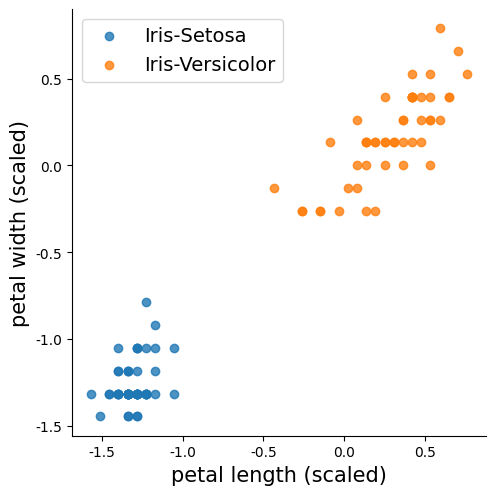

In [ ]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.show()

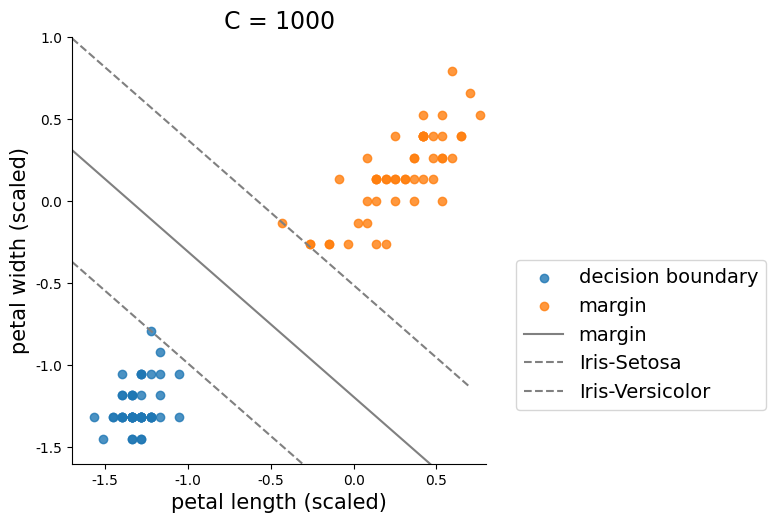

In [ ]:
# Linear Hard

C=1000 #C라는 하이퍼파라미터를 통해 Soft 와 Hard 를 구분함 크면 Hard 작으면 Soft
svc = LinearSVC(C=C,loss="hinge")
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# 파라미터 (W, b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], fontsize = 14, bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

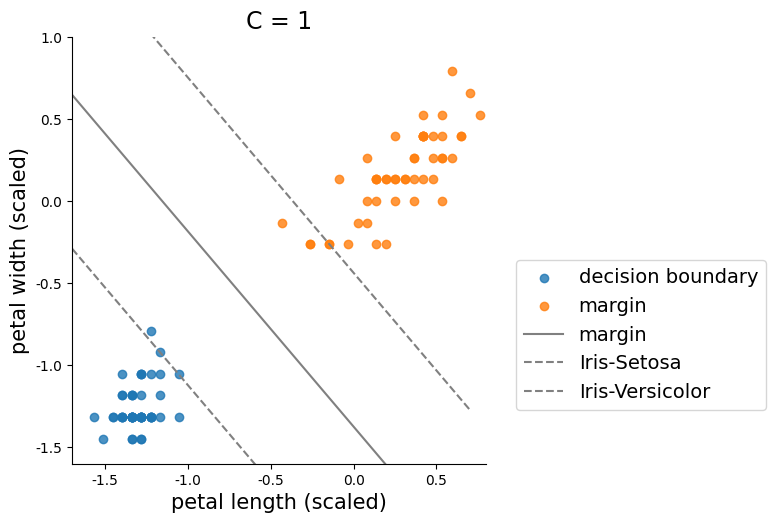

In [ ]:
# Linear Soft

C=1
svc = LinearSVC(C=C,loss="hinge")
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# 파라미터 (W, b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], fontsize = 14, bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

In [ ]:
iris = load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data.head()

X = iris.data[:, :2]
y = iris.target

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [ ]:
# 모델 정의&피팅
C = 1.0 #regularization parameter
models = (SVC(kernel='linear', C=C),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, gamma='auto', C=C),
          SVC(kernel='sigmoid', C=C))
models = (clf.fit(X, y) for clf in models)

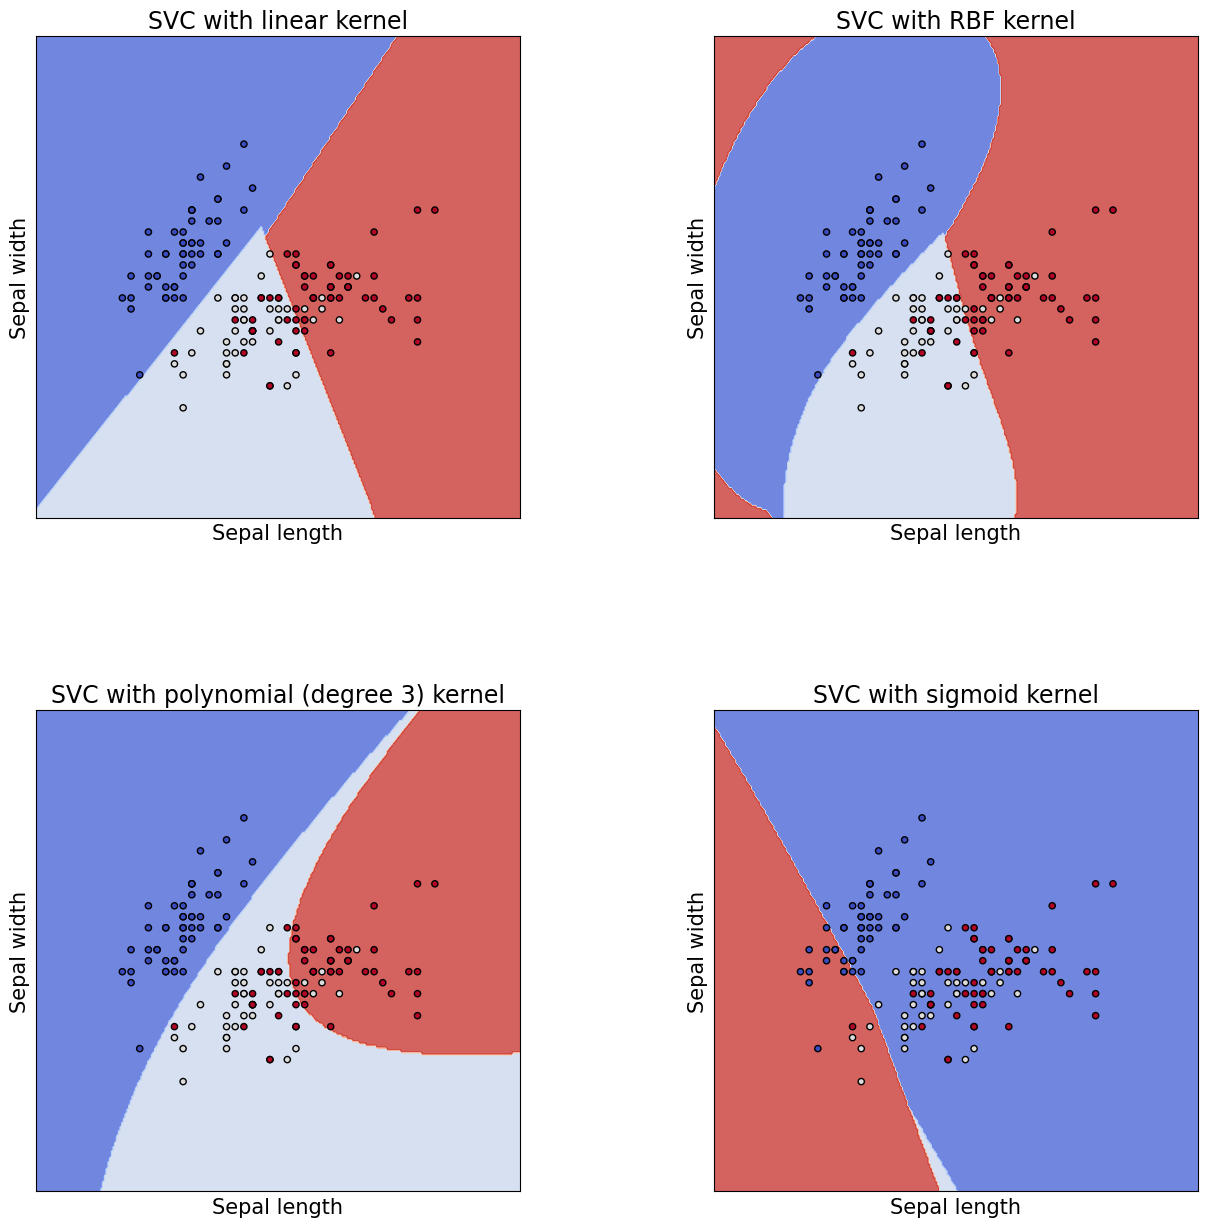

In [ ]:
# plot title 형성
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel')

# plot 그리기

fig, sub = plt.subplots(2, 2,figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length', fontsize = 15)
    ax.set_ylabel('Sepal width', fontsize = 15)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize = 17)

plt.show()

In [ ]:
breast_cancer = load_breast_cancer()

In [ ]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['diagnosis'])

In [ ]:
# Train set/ Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=2021)

# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (398, 30)
Test set dimension is (171, 30)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
svc = SVC(random_state=2021)
param_grid = [{'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'], 'degree':[2, 3, 5],'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['rbf'], 'gamma': ['auto', 'scale'],'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['sigmoid'], 'gamma': ['auto', 'scale'],'C': [0.1, 1, 10, 100, 1000]}]

scores = ['precision', 'recall']
for score in scores:
    print("# %s에 대한 하이퍼파라미터 튜닝 중" % score)
    print()

    CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, scoring=f'{score}_macro', cv=10, verbose=1, n_jobs=12)
    CV_svc.fit(X_train, y_train)

    print("개발 세트에서 찾은 최적의 하이퍼파라미터:")
    print()
    print(CV_svc.best_params_)
    print()
    print("개발 세트에서의 그리드 스코어:")
    print()
    means = CV_svc.cv_results_['mean_test_score']
    stds = CV_svc.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, CV_svc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("상세한 분류 보고서:")
    print()
    print("모델은 전체 개발 세트에 학습되었습니다.")
    print("스코어는 전체 평가 세트에서 계산되었습니다.")
    print()
    y_true, y_pred = y_test, CV_svc.predict(X_test)

CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=12)
CV_svc.fit(X_train, y_train)

# precision에 대한 하이퍼파라미터 튜닝 중

Fitting 10 folds for each of 40 candidates, totalling 400 fits
개발 세트에서 찾은 최적의 하이퍼파라미터:

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

개발 세트에서의 그리드 스코어:

0.964 (+/-0.040) for {'C': 0.1, 'kernel': 'linear'}
0.965 (+/-0.038) for {'C': 1, 'kernel': 'linear'}
0.968 (+/-0.046) for {'C': 10, 'kernel': 'linear'}
0.951 (+/-0.065) for {'C': 100, 'kernel': 'linear'}
0.934 (+/-0.069) for {'C': 1000, 'kernel': 'linear'}
0.849 (+/-0.025) for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.894 (+/-0.048) for {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
0.861 (+/-0.059) for {'C': 0.1, 'degree': 5, 'kernel': 'poly'}
0.850 (+/-0.108) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.926 (+/-0.046) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.881 (+/-0.070) for {'C': 1, 'degree': 5, 'kernel': 'poly'}
0.847 (+/-0.144) for {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.955 (+/-0.052) for {'C': 10, 'degree': 3, 'kernel': 'poly'}
0.916 (+/-0.056) for {'C': 10, 'degree': 5, 'kernel': 'poly'}
0.

GridSearchCV(cv=10, estimator=SVC(random_state=2021), n_jobs=12,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 5],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['sigmoid']}],
             verbose=1)

In [ ]:
best_svc = CV_svc.best_estimator_
best_svc.fit(X_train, y_train)

SVC(C=10, gamma='auto', random_state=2021)

In [ ]:
y_pred = best_svc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

# Test set에 대한 성능
y_pred = best_svc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")

Train set에 대한 성능
정확도:0.9925


Test set에 대한 성능
정확도:0.9825


In [ ]:
recall = recall_score(y_true = y_test, y_pred =y_pred) ## 민감도
precision = precision_score(y_true = y_test, y_pred =y_pred) ## 정밀도


print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep='  |  ')

정확도:0.9825  |  민감도:0.9813  |  정밀도:0.9906


In [ ]:
plot_confusion_matrix(best_svc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

NameError: ignored

In [ ]:
plot_confusion_matrix(best_svc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()